In [1]:
import numpy as np

In [2]:
import seaborn as sns
import matplotlib.pyplot as plt

In [3]:
class_names = ['upper_ns', 'middle_ns', 'lower_ns',
                   'rijnland_chalk', 'scruff', 'zechstein']

class_names2 = ['U', 'M', 'L', 'R/C', 'S', 'Z']

In [4]:
n_classes=6

segformer + section

In [5]:
def get_scores(confusion_matrix, n_classes=6):
    """Returns accuracy score evaluation result.
        - overall accuracy
        - mean accuracy
        - mean IU
        - fwavacc
    """
    hist = confusion_matrix
    row, col = np.diag_indices_from(hist)
    acc = np.diag(hist).sum() / hist.sum()      # 准确率，预测正确的像素点数 / 像素点数
    acc_cls = np.diag(hist) / hist.sum(axis=1)  # 每个类别预测正确的TP / 每个类别像素点数量TP+TN
    mean_acc_cls = np.nanmean(acc_cls)          # 平均类别准确率  mcp
    iu = np.diag(hist) / (hist.sum(axis=1) + hist.sum(axis=0) - np.diag(hist)) # TP / (TP + FP + FN)
    mean_iu = np.nanmean(iu)
    freq = hist.sum(axis=1) / hist.sum() # fraction of the pixels that come from each class
    fwavacc = (freq[freq > 0] * iu[freq > 0]).sum()
    cls_iu = dict(zip(range(n_classes), iu))

    return {'Pixel Acc: ': acc,
            'Class Accuracy: ': acc_cls,
            'Mean Class Acc: ': mean_acc_cls,
            'Freq Weighted IoU: ': fwavacc,
            'Mean IoU: ': mean_iu,
            'confusion_matrix': confusion_matrix}, cls_iu

In [6]:
segformer_sec = np.loadtxt("runs-section/Sep01_105122_segformer_test/confusion.csv")

In [7]:
score, _ = get_scores(segformer_sec)
print('--------------- 原来的 RESULTS -----------------')
print(f'Pixel Acc: {score["Pixel Acc: "]:.3f}')
print(score["Class Accuracy: "])
# for cdx, class_name in enumerate(class_names):
#     print(f'     {class_name}_accuracy {score["Class Accuracy: "][cdx]:.3f}')
print(f'Mean Class Acc: {score["Mean Class Acc: "]:.3f}')
print(f'Freq Weighted IoU: {score["Freq Weighted IoU: "]:.3f}')
print(f'Mean IoU: {score["Mean IoU: "]:0.3f}')
print(f'{score["Pixel Acc: "]:.3f}、{score["Class Accuracy: "]}、{score["Mean Class Acc: "]:.3f}、{score["Freq Weighted IoU: "]:.3f}、{score["Mean IoU: "]:0.3f}')

--------------- 原来的 RESULTS -----------------
Pixel Acc: 0.896
[0.97747724 0.90547553 0.96272222 0.84415345 0.5892249  0.71839258]
Mean Class Acc: 0.833
Freq Weighted IoU: 0.817
Mean IoU: 0.713
0.896、[0.97747724 0.90547553 0.96272222 0.84415345 0.5892249  0.71839258]、0.833、0.817、0.713


In [8]:
annot_kws={"fontsize":20}

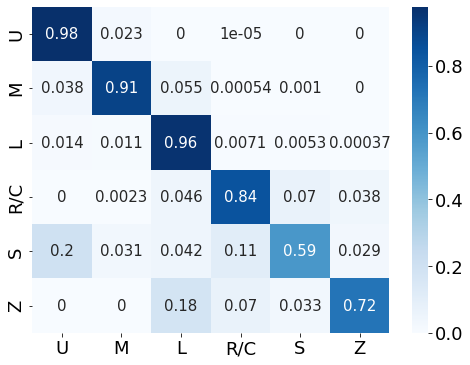

In [9]:
plt.figure(figsize=(8, 6))
g = sns.heatmap(segformer_sec/segformer_sec.sum(1, keepdims=True), xticklabels=class_names2, 
                     yticklabels=class_names2, cmap=plt.cm.Blues, annot=True, annot_kws={"fontsize":15})
plt.xticks(fontsize=18)
plt.yticks(fontsize=18)
cbar = g.collections[0].colorbar
cbar.ax.tick_params(labelsize=18)
heatmap = g.get_figure()
plt.rcParams['savefig.dpi'] = 300 # 图片像素
plt.rcParams['figure.dpi'] = 300 # 分辨率
plt.savefig("confusion_55/segformer_sec.png", dpi=300)

In [13]:
usegformer_sec = np.loadtxt("runs-section/Sep01_120249_usegformer_test/confusion.csv")
score, _ = get_scores(usegformer_sec)
print('--------------- 原来的 RESULTS -----------------')
print(f'Pixel Acc: {score["Pixel Acc: "]:.3f}')
print(score["Class Accuracy: "])
# for cdx, class_name in enumerate(class_names):
#     print(f'     {class_name}_accuracy {score["Class Accuracy: "][cdx]:.3f}')
print(f'Mean Class Acc: {score["Mean Class Acc: "]:.3f}')
print(f'Freq Weighted IoU: {score["Freq Weighted IoU: "]:.3f}')
print(f'Mean IoU: {score["Mean IoU: "]:0.3f}')
print(f'{score["Pixel Acc: "]:.3f}、{score["Class Accuracy: "]}、{score["Mean Class Acc: "]:.3f}、{score["Freq Weighted IoU: "]:.3f}、{score["Mean IoU: "]:0.3f}')

--------------- 原来的 RESULTS -----------------
Pixel Acc: 0.901
[0.97630959 0.91134947 0.97324024 0.86607033 0.56211214 0.80005152]
Mean Class Acc: 0.848
Freq Weighted IoU: 0.828
Mean IoU: 0.717
0.901、[0.97630959 0.91134947 0.97324024 0.86607033 0.56211214 0.80005152]、0.848、0.828、0.717


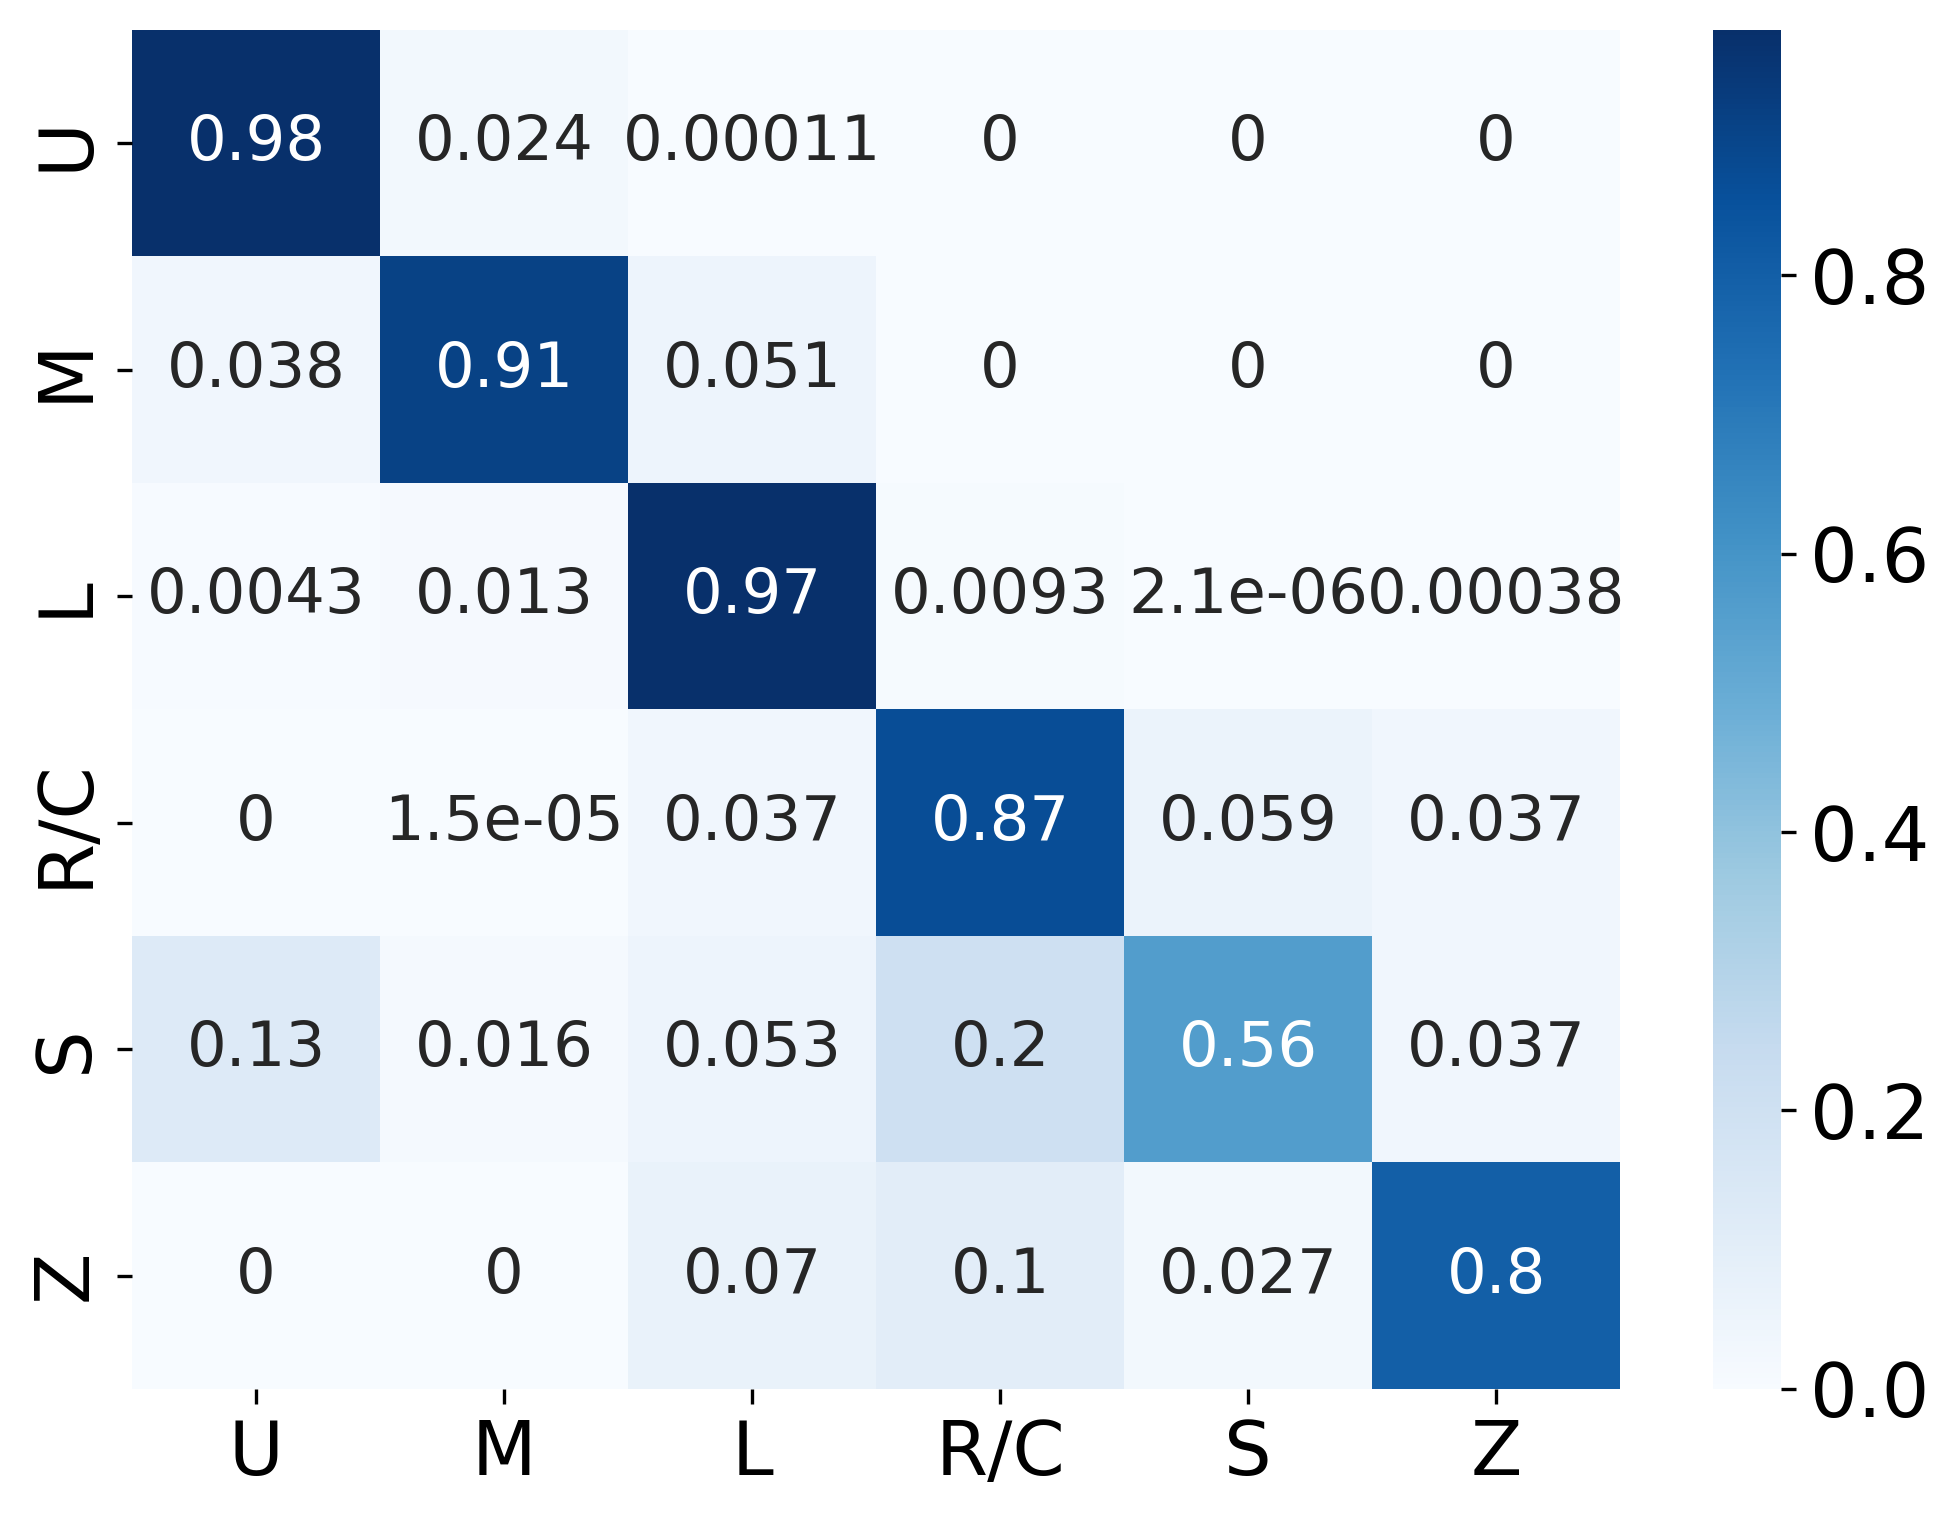

In [15]:
annot_kws={"fontsize":20}
plt.figure(figsize=(8, 6))
g = sns.heatmap(usegformer_sec/usegformer_sec.sum(1, keepdims=True), xticklabels=class_names2, 
                     yticklabels=class_names2, cmap=plt.cm.Blues, annot=True, annot_kws={"fontsize":15})
plt.xticks(fontsize=18)
plt.yticks(fontsize=18)
cbar = g.collections[0].colorbar
cbar.ax.tick_params(labelsize=18)
heatmap = g.get_figure()
plt.rcParams['savefig.dpi'] = 300 # 图片像素
plt.rcParams['figure.dpi'] = 300 # 分辨率
plt.savefig("confusion_55/U-segformer_sec.png", dpi=300)

In [16]:
usegformerhyper_sec = np.loadtxt("runs-section/Aug29_164926_usegformerhyper_test/confusion.csv")
score, _ = get_scores(usegformerhyper_sec)
print('--------------- 原来的 RESULTS -----------------')
print(f'Pixel Acc: {score["Pixel Acc: "]:.3f}')
print(score["Class Accuracy: "])
# for cdx, class_name in enumerate(class_names):
#     print(f'     {class_name}_accuracy {score["Class Accuracy: "][cdx]:.3f}')
print(f'Mean Class Acc: {score["Mean Class Acc: "]:.3f}')
print(f'Freq Weighted IoU: {score["Freq Weighted IoU: "]:.3f}')
print(f'Mean IoU: {score["Mean IoU: "]:0.3f}')
print(f'{score["Pixel Acc: "]:.3f}、{score["Class Accuracy: "]}、{score["Mean Class Acc: "]:.3f}、{score["Freq Weighted IoU: "]:.3f}、{score["Mean IoU: "]:0.3f}')

--------------- 原来的 RESULTS -----------------
Pixel Acc: 0.907
[0.97518345 0.90300337 0.97395027 0.86290422 0.62075679 0.77727975]
Mean Class Acc: 0.852
Freq Weighted IoU: 0.836
Mean IoU: 0.736
0.907、[0.97518345 0.90300337 0.97395027 0.86290422 0.62075679 0.77727975]、0.852、0.836、0.736


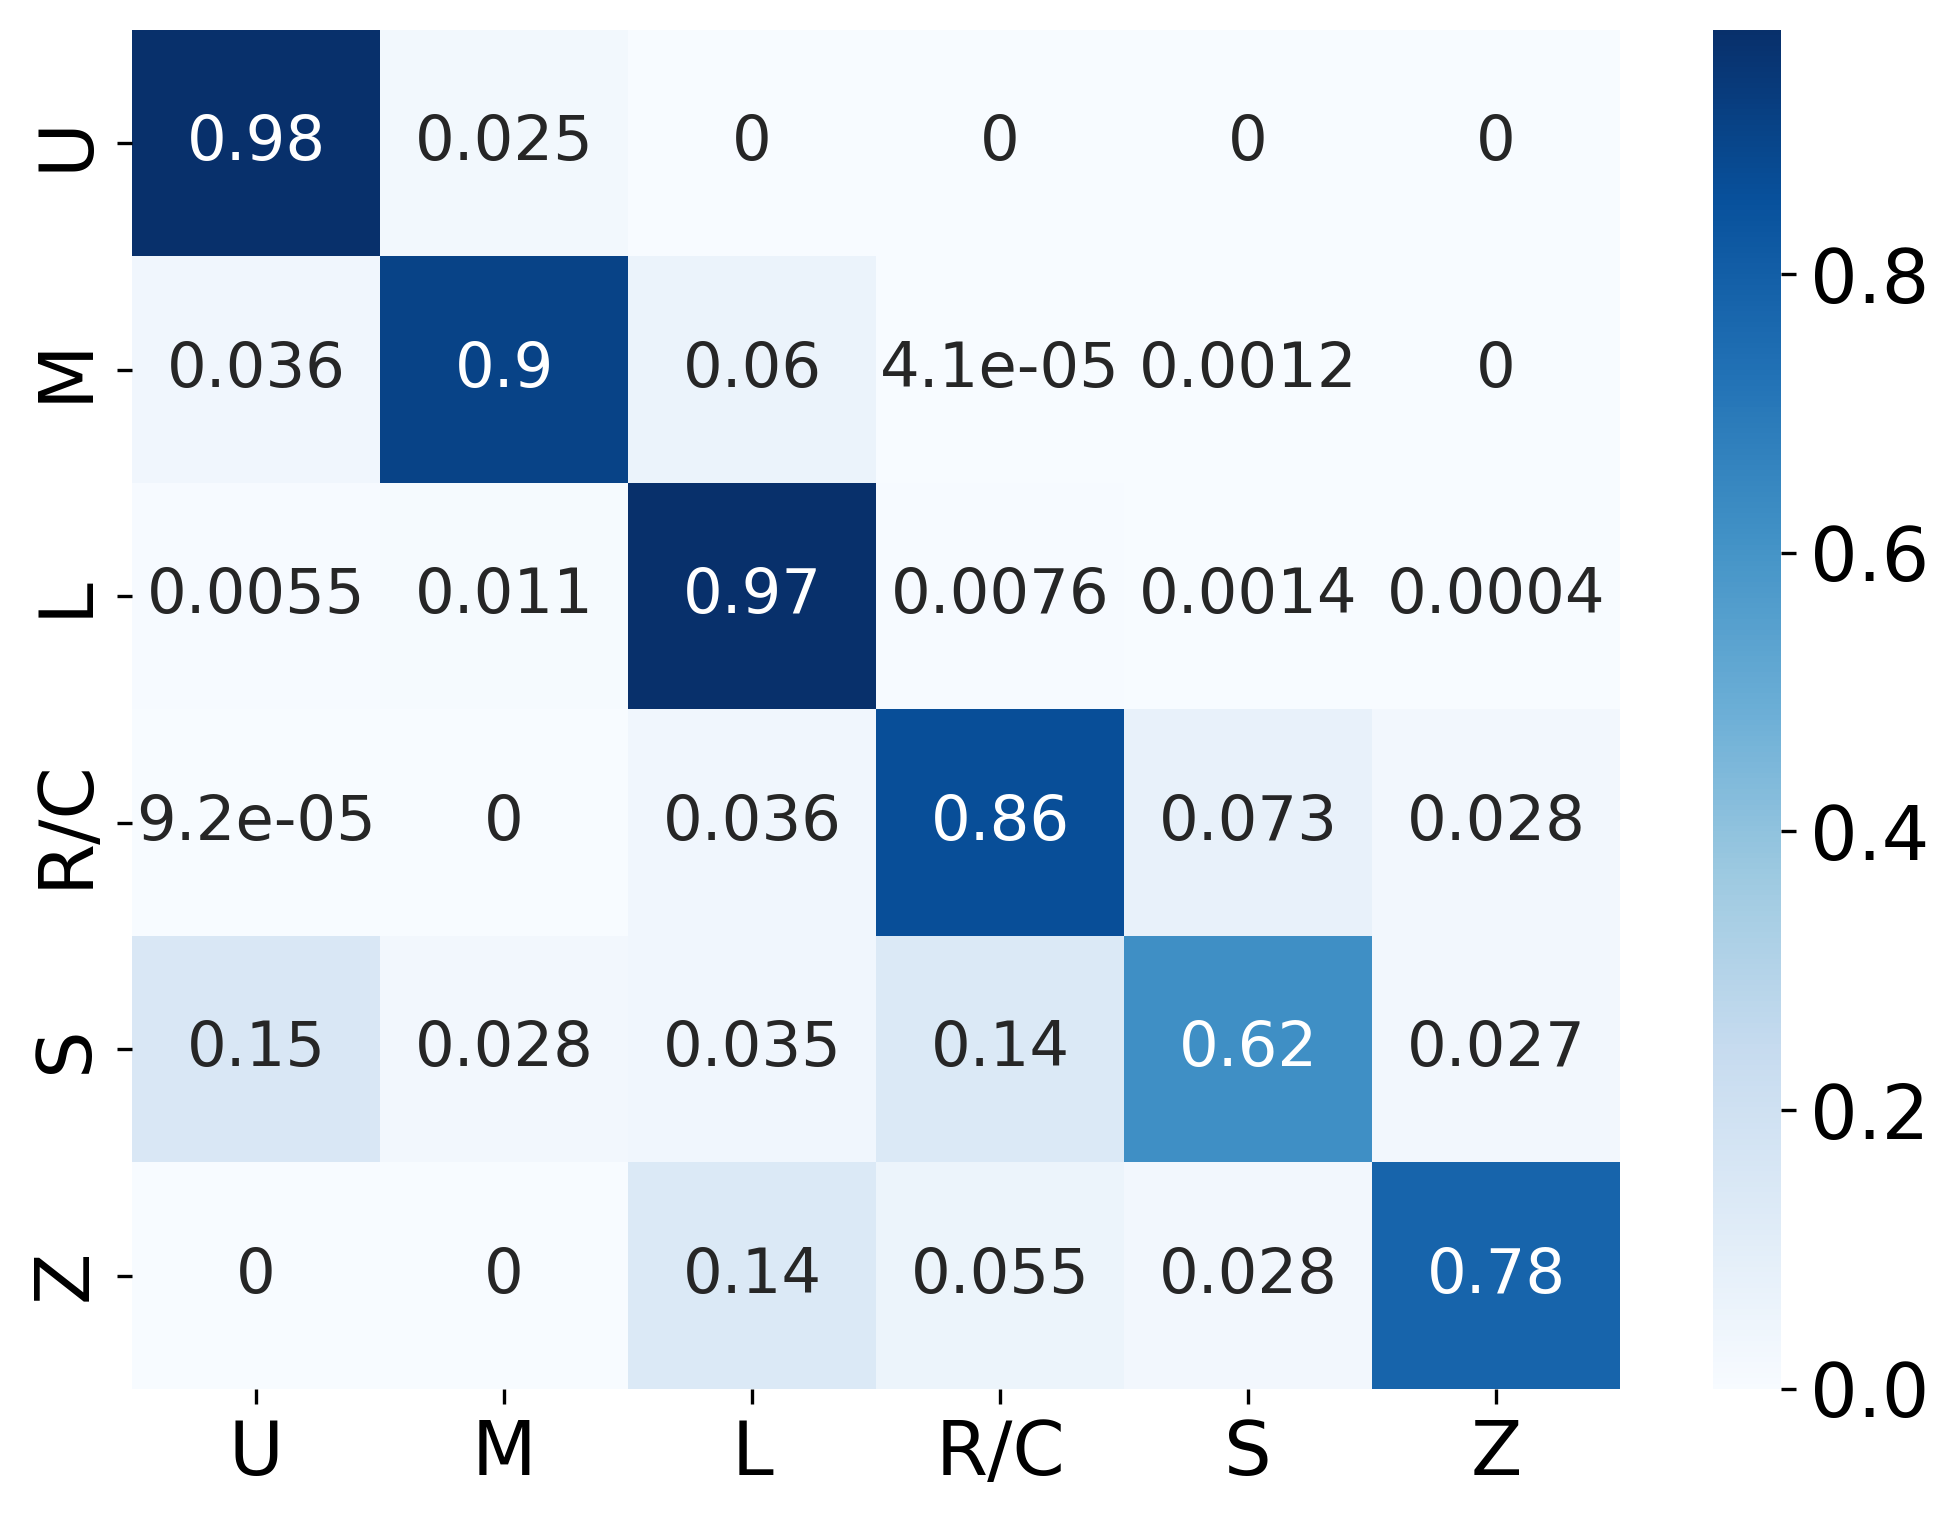

In [17]:
annot_kws={"fontsize":20}
plt.figure(figsize=(8, 6))
g = sns.heatmap(usegformerhyper_sec/usegformerhyper_sec.sum(1, keepdims=True), xticklabels=class_names2, 
                     yticklabels=class_names2, cmap=plt.cm.Blues, annot=True, annot_kws={"fontsize":15})
plt.xticks(fontsize=18)
plt.yticks(fontsize=18)
cbar = g.collections[0].colorbar
cbar.ax.tick_params(labelsize=18)
heatmap = g.get_figure()
plt.rcParams['savefig.dpi'] = 300 # 图片像素
plt.rcParams['figure.dpi'] = 300 # 分辨率
plt.savefig("confusion_55/U-segformer-Hyper_sec.png", dpi=300)

segformer + patch

In [18]:
segformer_patch = np.loadtxt("runs-patch/Aug28_230635_segformer/confusion.csv")
hist = segformer_patch.copy()
row, col = np.diag_indices_from(hist)
acc = np.diag(hist).sum() / hist.sum()      # 准确率，预测正确的像素点数 / 像素点数
acc_cls = np.diag(hist) / hist.sum(axis=1)  # 每个类别预测正确的TP / 每个类别像素点数量TP+TN
mean_acc_cls = np.nanmean(acc_cls)          # 平均类别准确率  mcp
iu = np.diag(hist) / (hist.sum(axis=1) + hist.sum(axis=0) - np.diag(hist)) # TP / (TP + FP + FN)
mean_iu = np.nanmean(iu)
freq = hist.sum(axis=1) / hist.sum() # fraction of the pixels that come from each class
fwavacc = (freq[freq > 0] * iu[freq > 0]).sum()
cls_iu = dict(zip(range(n_classes), iu))
name = "segformer-patch"
score =  {'Pixel Acc: ': acc, 'Class Accuracy: ': acc_cls,  'Mean Class Acc: ': mean_acc_cls,
        'Freq Weighted IoU: ': fwavacc,  'Mean IoU: ': mean_iu,}
# np.savetxt(f"artificalRes/{name}.csv", hist, delimiter=" ")
print(f'--------------- {name} RESULTS -----------------')
print(f'{score["Pixel Acc: "]:.4f}、{score["Class Accuracy: "]}、{score["Mean Class Acc: "]:.4f}、{score["Freq Weighted IoU: "]:.4f}、{score["Mean IoU: "]:0.4f}')

--------------- segformer-patch RESULTS -----------------
0.8879、[0.97339379 0.91753703 0.98111361 0.75484253 0.37428234 0.37958319]、0.7301、0.7981、0.6526


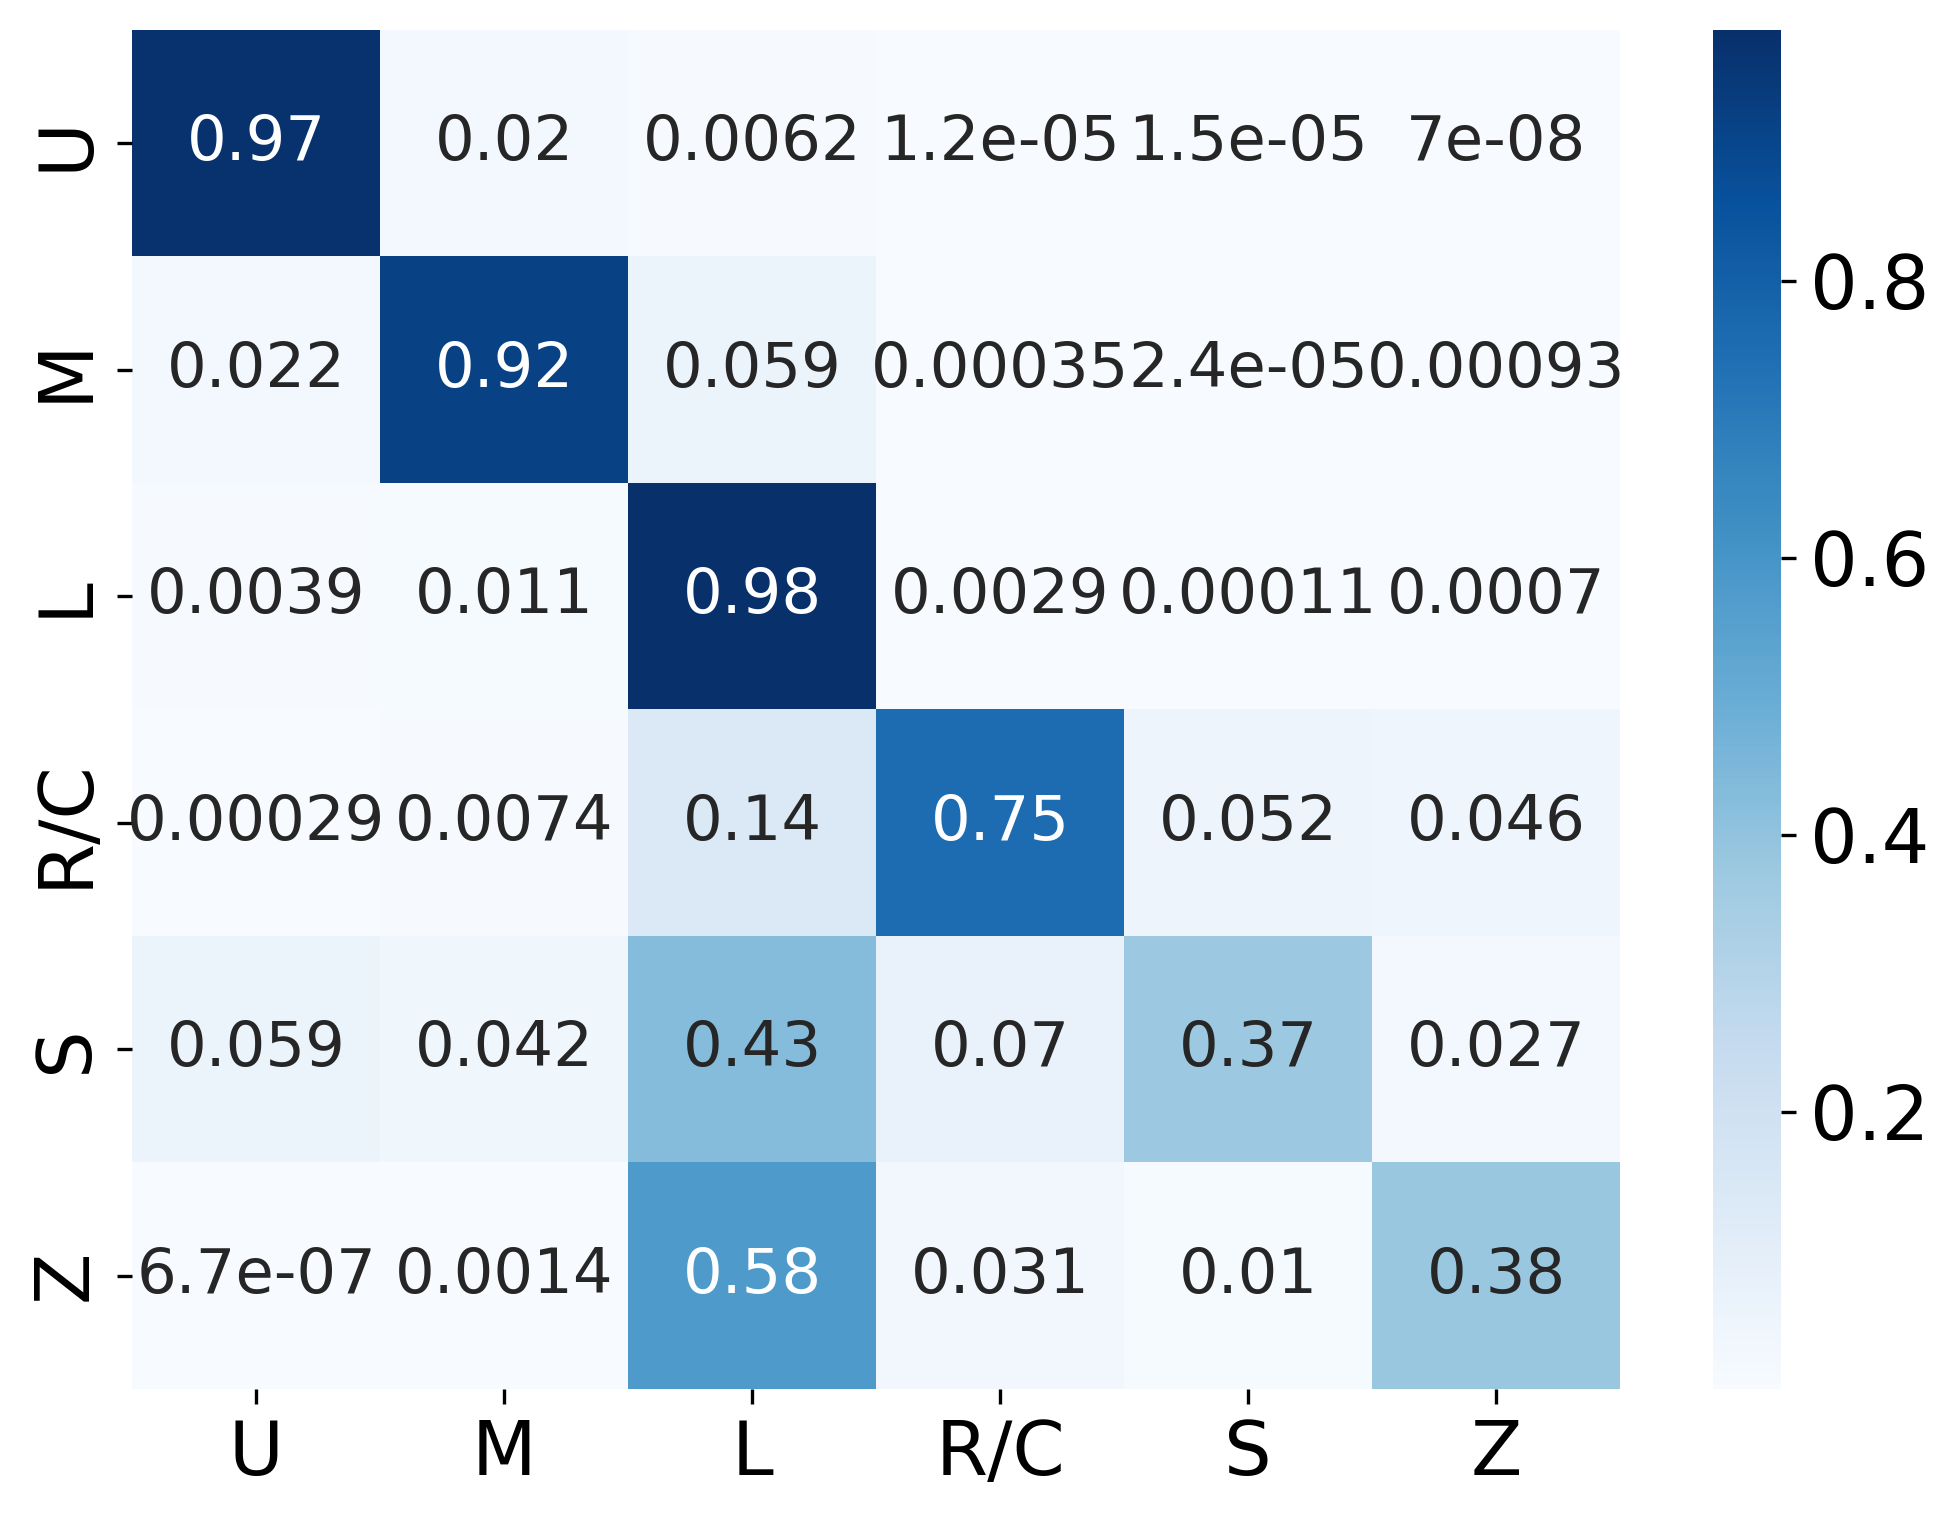

In [19]:
plt.figure(figsize=(8, 6))
g = sns.heatmap(hist/hist.sum(1, keepdims=True), xticklabels=class_names2, 
                     yticklabels=class_names2, cmap=plt.cm.Blues, annot=True, annot_kws={"fontsize":15})
plt.xticks(fontsize=18)
plt.yticks(fontsize=18)
cbar = g.collections[0].colorbar
cbar.ax.tick_params(labelsize=18)
heatmap = g.get_figure()
plt.rcParams['savefig.dpi'] = 300 # 图片像素
plt.rcParams['figure.dpi'] = 300 # 分辨率
plt.savefig("confusion_55/segformer_patch.png", dpi=300)

In [20]:
usegformer_patch = np.loadtxt("runs-patch/Aug28_155525_usegformer/confusion.csv")
hist = usegformer_patch.copy()
row, col = np.diag_indices_from(hist)
acc = np.diag(hist).sum() / hist.sum()      # 准确率，预测正确的像素点数 / 像素点数
acc_cls = np.diag(hist) / hist.sum(axis=1)  # 每个类别预测正确的TP / 每个类别像素点数量TP+TN
mean_acc_cls = np.nanmean(acc_cls)          # 平均类别准确率  mcp
iu = np.diag(hist) / (hist.sum(axis=1) + hist.sum(axis=0) - np.diag(hist)) # TP / (TP + FP + FN)
mean_iu = np.nanmean(iu)
freq = hist.sum(axis=1) / hist.sum() # fraction of the pixels that come from each class
fwavacc = (freq[freq > 0] * iu[freq > 0]).sum()
cls_iu = dict(zip(range(n_classes), iu))
name = "usegformer-patch"
score =  {'Pixel Acc: ': acc, 'Class Accuracy: ': acc_cls,  'Mean Class Acc: ': mean_acc_cls,
        'Freq Weighted IoU: ': fwavacc,  'Mean IoU: ': mean_iu,}
# np.savetxt(f"artificalRes/{name}.csv", hist, delimiter=" ")
print(f'--------------- {name} RESULTS -----------------')
print(f'{score["Pixel Acc: "]:.4f}、{score["Class Accuracy: "]}、{score["Mean Class Acc: "]:.4f}、{score["Freq Weighted IoU: "]:.4f}、{score["Mean IoU: "]:0.4f}')

--------------- usegformer-patch RESULTS -----------------
0.8955、[0.97257688 0.92095414 0.98707575 0.76524253 0.38782554 0.49127773]、0.7542、0.8117、0.6774


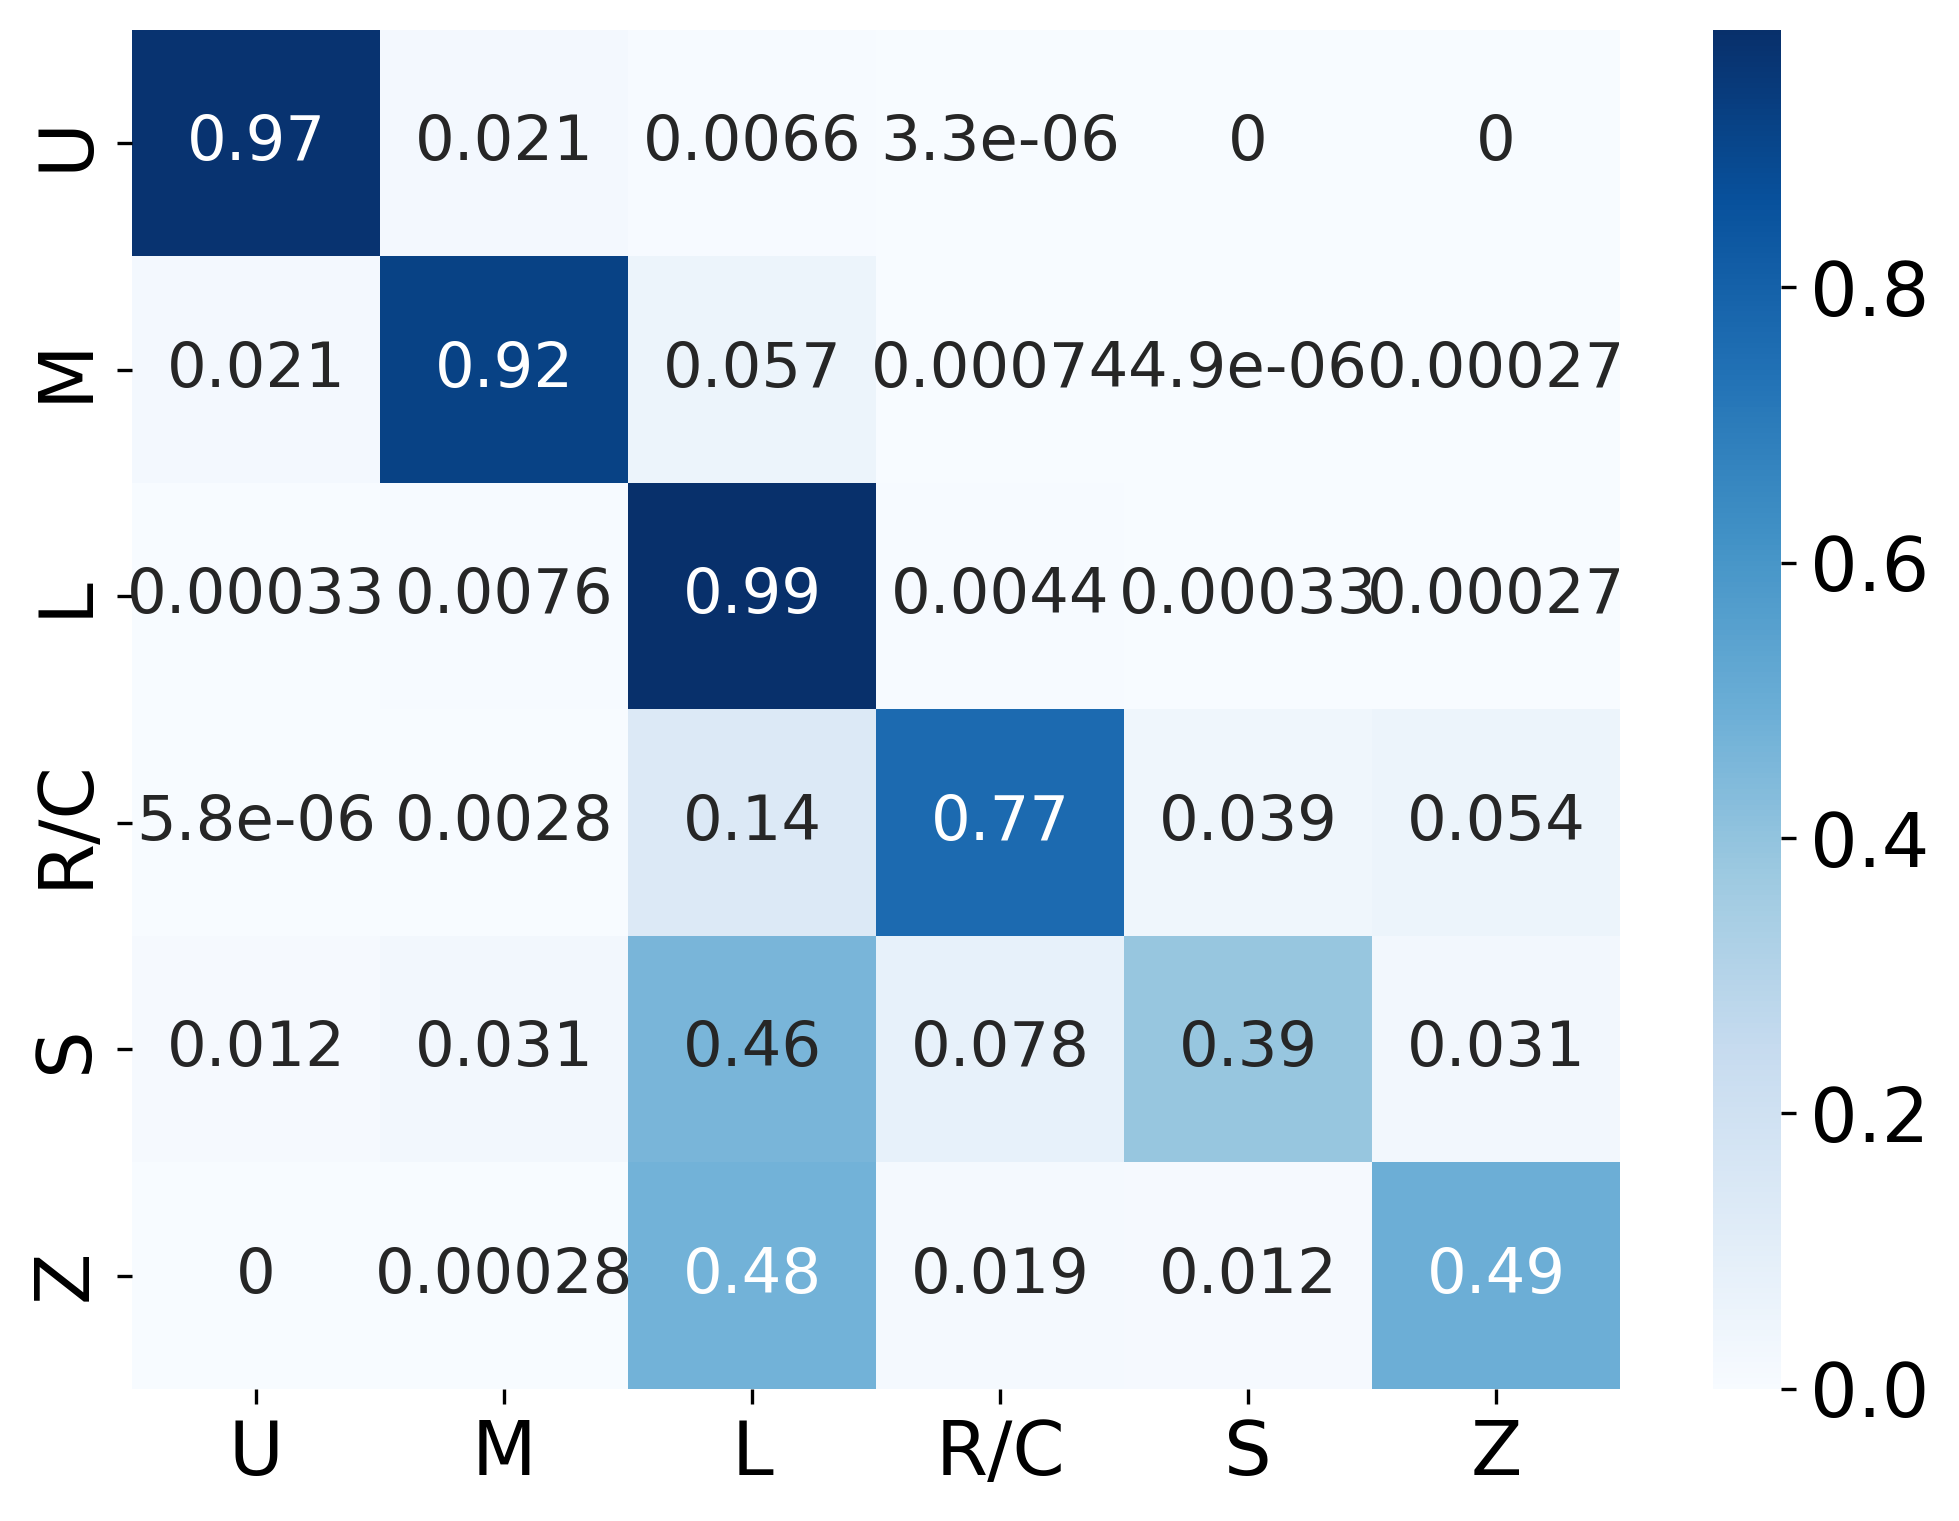

In [21]:
plt.figure(figsize=(8, 6))
g = sns.heatmap(hist/hist.sum(1, keepdims=True), xticklabels=class_names2, 
                     yticklabels=class_names2, cmap=plt.cm.Blues, annot=True, annot_kws={"fontsize":15})
plt.xticks(fontsize=18)
plt.yticks(fontsize=18)
cbar = g.collections[0].colorbar
cbar.ax.tick_params(labelsize=18)
heatmap = g.get_figure()
plt.rcParams['savefig.dpi'] = 300 # 图片像素
plt.rcParams['figure.dpi'] = 300 # 分辨率
plt.savefig("confusion_55/U-segformer_patch.png", dpi=300)


In [22]:
usegformerhyper_patch = np.loadtxt("runs-patch/Sep03_091818_usegformerhyper_test/confusion.csv")
hist = usegformerhyper_patch.copy()
row, col = np.diag_indices_from(hist)
acc = np.diag(hist).sum() / hist.sum()      # 准确率，预测正确的像素点数 / 像素点数
acc_cls = np.diag(hist) / hist.sum(axis=1)  # 每个类别预测正确的TP / 每个类别像素点数量TP+TN
mean_acc_cls = np.nanmean(acc_cls)          # 平均类别准确率  mcp
iu = np.diag(hist) / (hist.sum(axis=1) + hist.sum(axis=0) - np.diag(hist)) # TP / (TP + FP + FN)
mean_iu = np.nanmean(iu)
freq = hist.sum(axis=1) / hist.sum() # fraction of the pixels that come from each class
fwavacc = (freq[freq > 0] * iu[freq > 0]).sum()
cls_iu = dict(zip(range(n_classes), iu))
name = "u-segformer-hyper-patch"
score =  {'Pixel Acc: ': acc, 'Class Accuracy: ': acc_cls,  'Mean Class Acc: ': mean_acc_cls,
        'Freq Weighted IoU: ': fwavacc,  'Mean IoU: ': mean_iu,}
# np.savetxt(f"artificalRes/{name}.csv", hist, delimiter=" ")
print(f'--------------- {name} RESULTS -----------------')
print(f'{score["Pixel Acc: "]:.4f}、{score["Class Accuracy: "]}、{score["Mean Class Acc: "]:.4f}、{score["Freq Weighted IoU: "]:.4f}、{score["Mean IoU: "]:0.4f}')

--------------- u-segformer-hyper-patch RESULTS -----------------
0.8969、[0.97390767 0.91497462 0.98279057 0.7628777  0.42778697 0.50229902]、0.7608、0.8135、0.6811


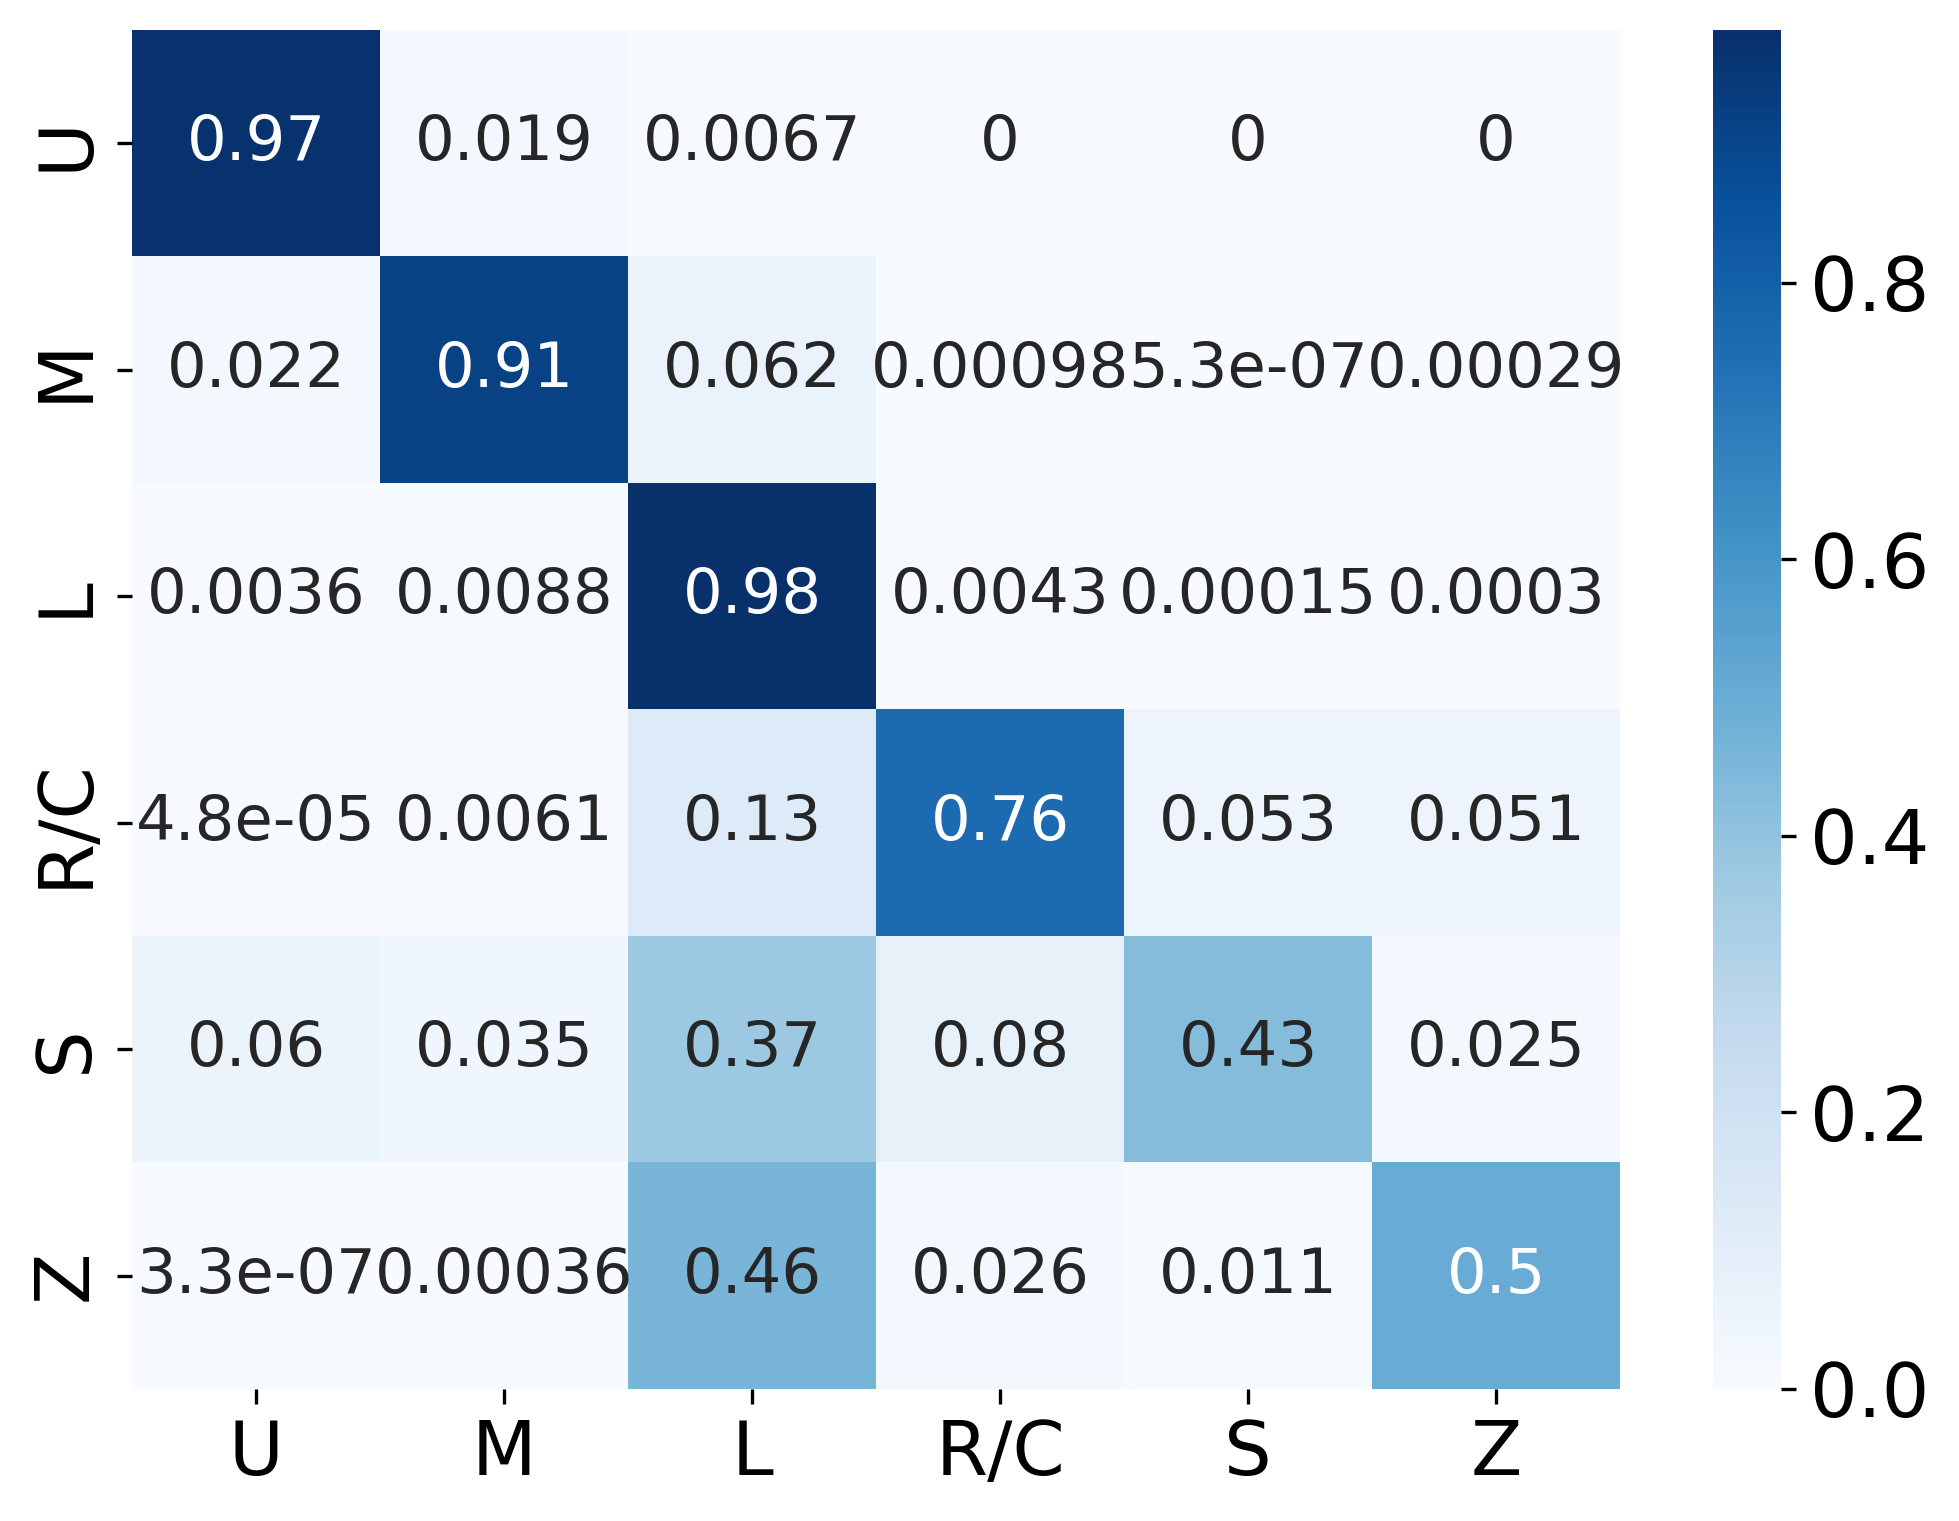

In [23]:
plt.figure(figsize=(8, 6))
g = sns.heatmap(hist/hist.sum(1, keepdims=True), xticklabels=class_names2, 
                     yticklabels=class_names2, cmap=plt.cm.Blues, annot=True, annot_kws={"fontsize":15})
plt.xticks(fontsize=18)
plt.yticks(fontsize=18)
cbar = g.collections[0].colorbar
cbar.ax.tick_params(labelsize=18)
heatmap = g.get_figure()
plt.rcParams['savefig.dpi'] = 300 # 图片像素
plt.rcParams['figure.dpi'] = 300 # 分辨率
plt.savefig("confusion_55/U-segformer-Hyper_patch.png", dpi=300)

### baseline

In [24]:
hist = np.array([[0.75, 0.017, 0.23, 3.8e-5, 0, 0], [0.019, 0.8, 0.18, 1.4e-3, 7.2e-5, 2e-4],
       [0.00026, 0.0062, 0.99, 0.0012, 3e-5, 8.2e-5], [8.6e-5, 0.0027, 0.44, 0.5, 0.017, 0.038],
       [0.011, 0.016, 0.81, 0.062, 0.074, 0.027], [0, 0.00014, 0.69, 0.041, 0.0017, 0.26]])

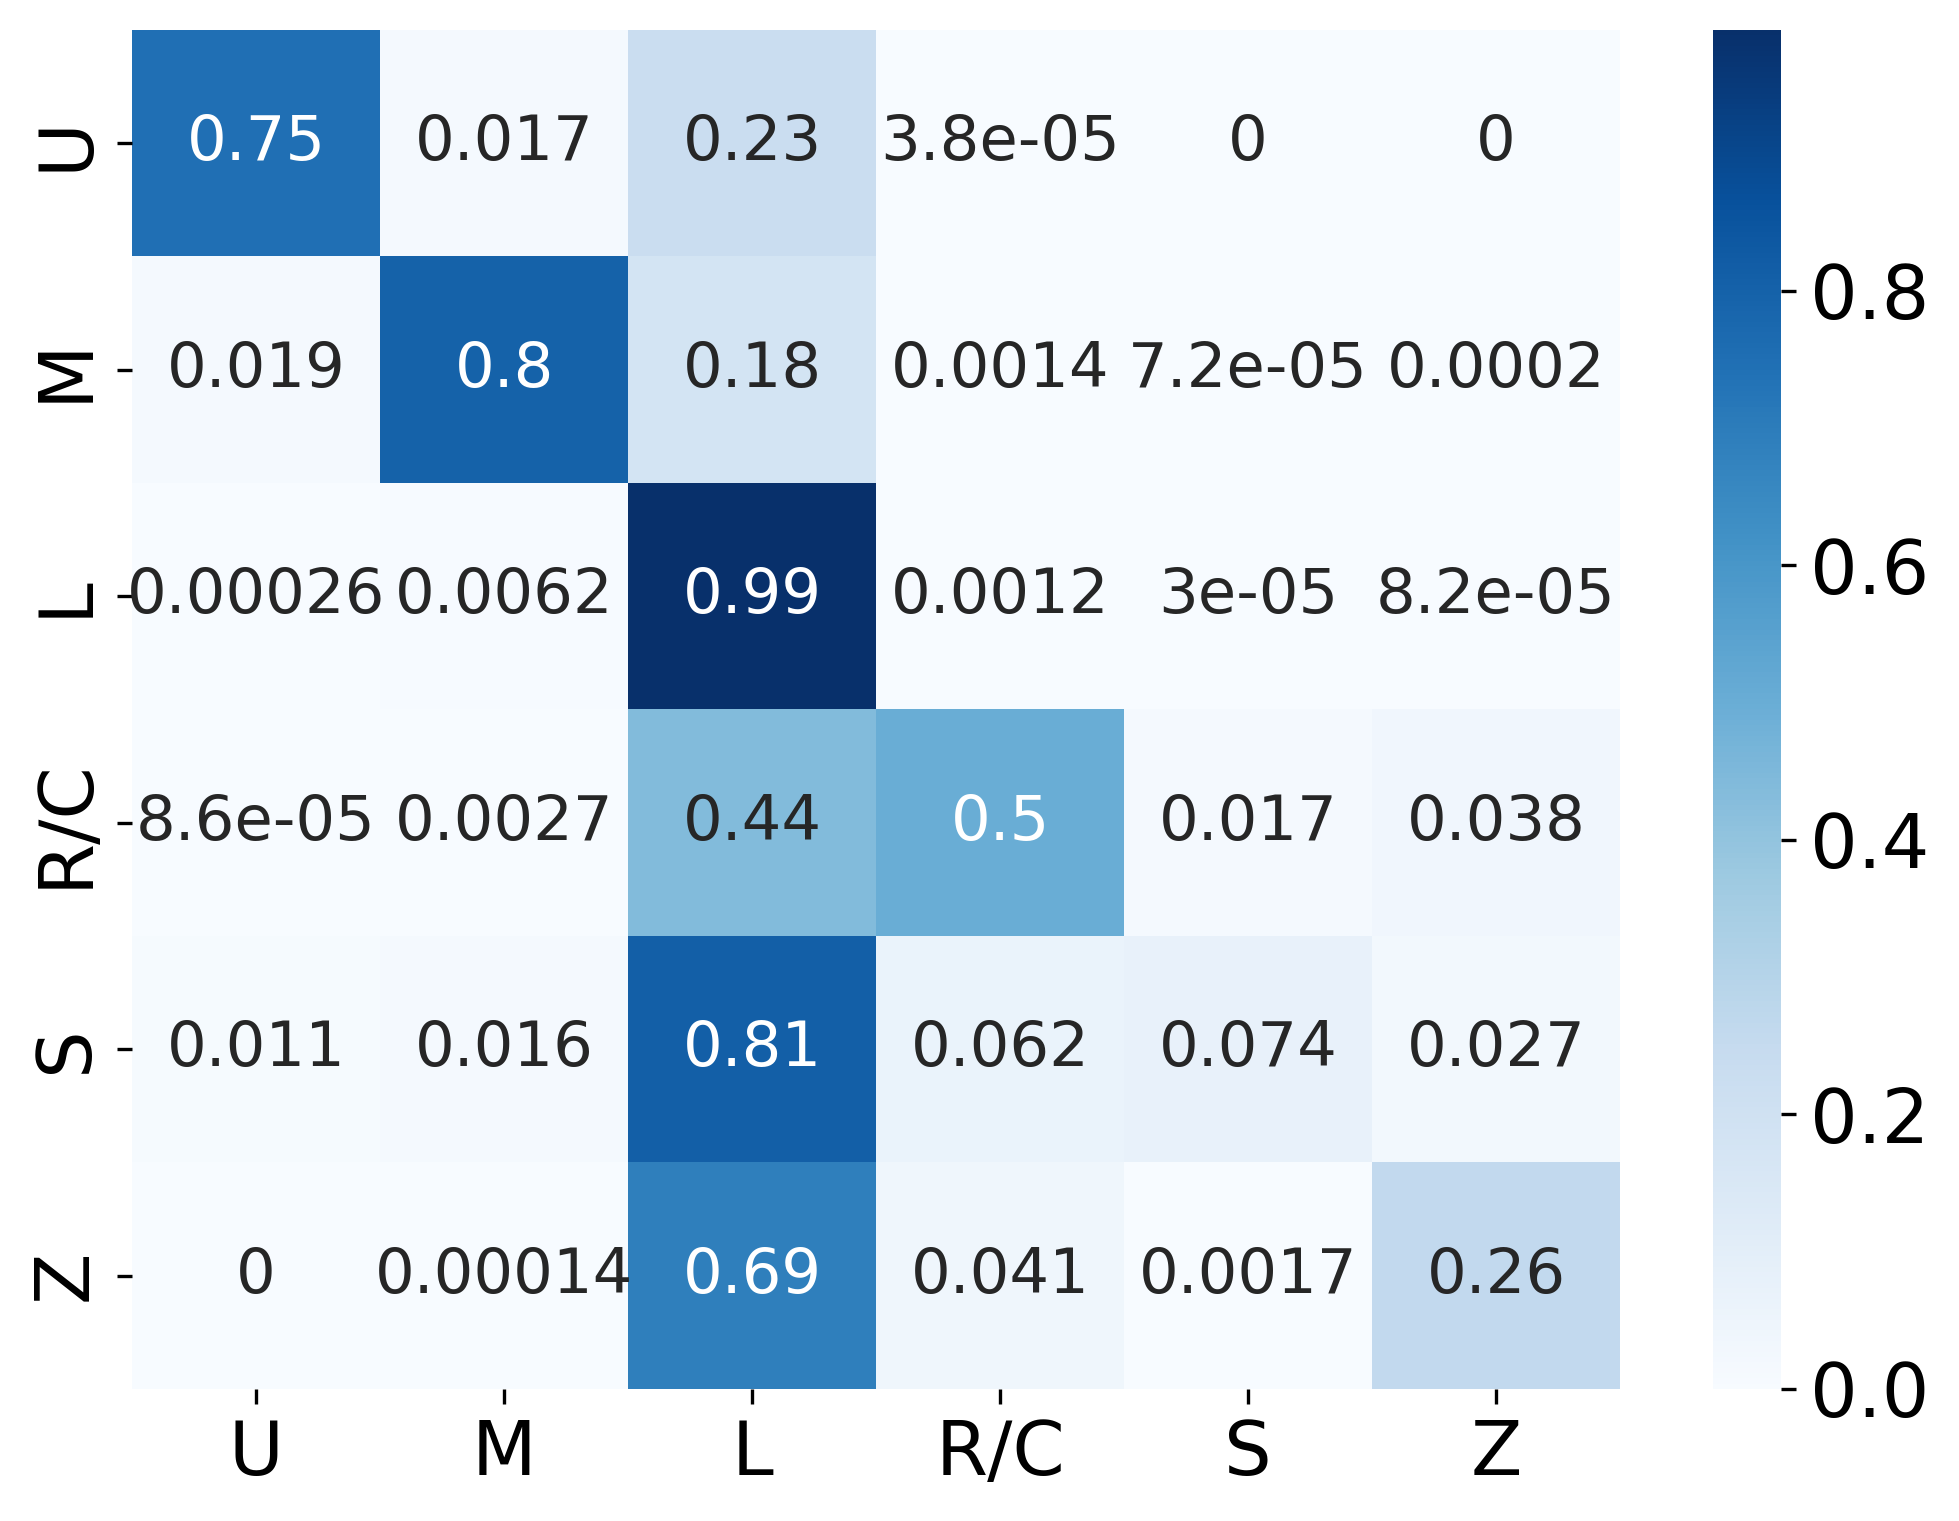

In [25]:
plt.figure(figsize=(8, 6))
g = sns.heatmap(hist, xticklabels=class_names2, 
                     yticklabels=class_names2, cmap=plt.cm.Blues,
                      annot=True, annot_kws={"fontsize":15})
plt.xticks(fontsize=18)
plt.yticks(fontsize=18)
cbar = g.collections[0].colorbar
cbar.ax.tick_params(labelsize=18)
heatmap = g.get_figure()
plt.rcParams['savefig.dpi'] = 300 # 图片像素
plt.rcParams['figure.dpi'] = 300 # 分辨率
plt.savefig("confusion_55/Baseline_patch.png", dpi=300)

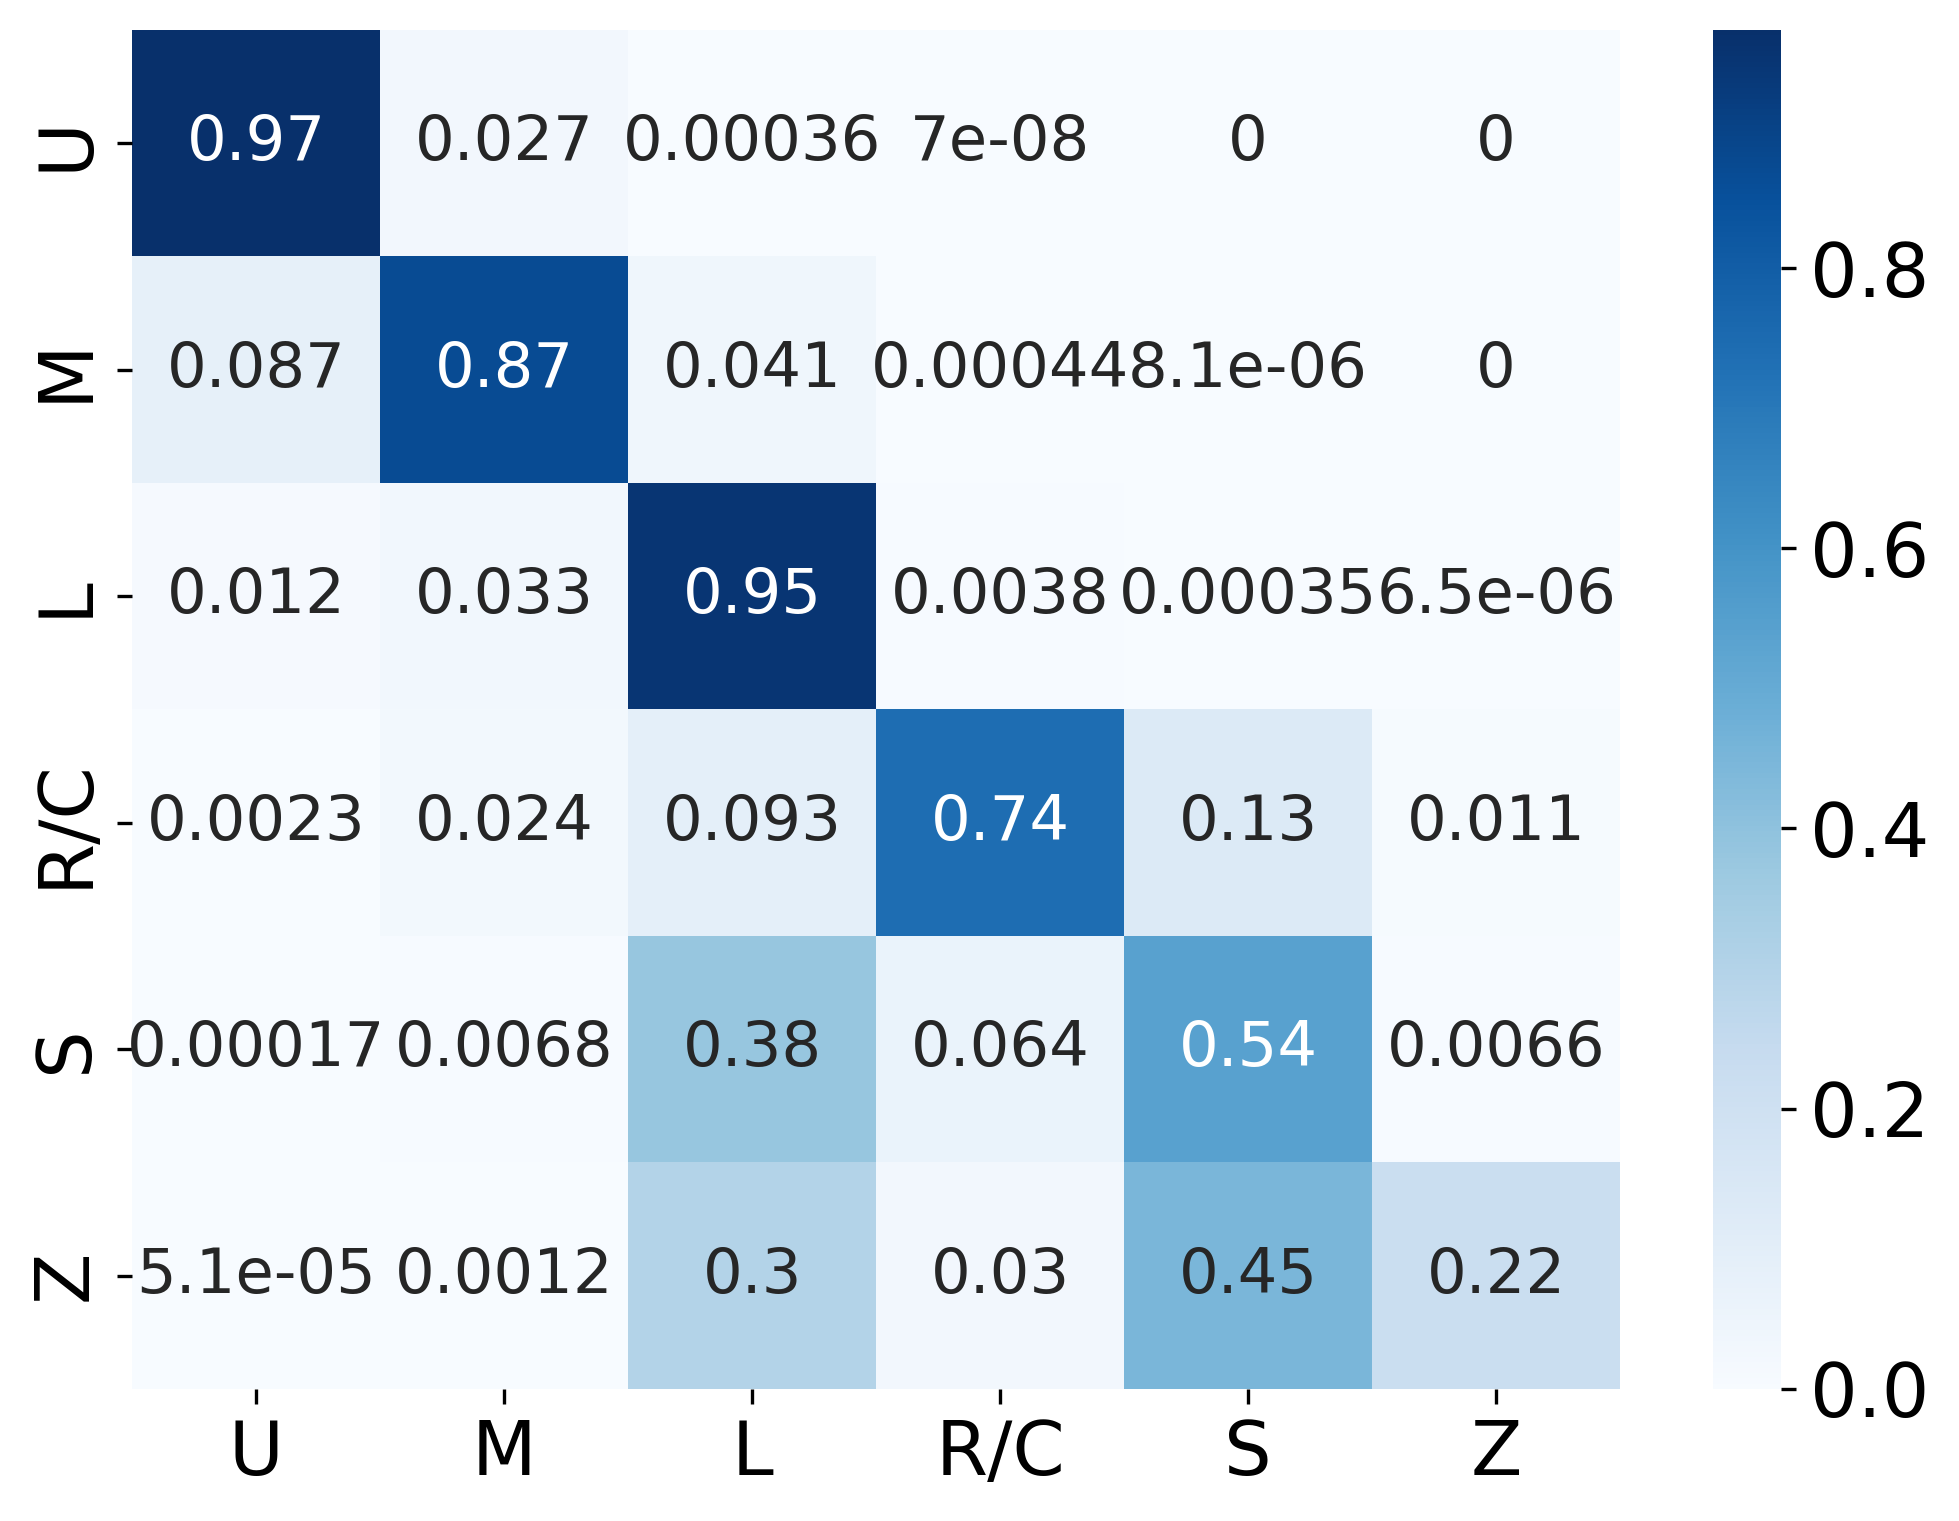

In [26]:
hist = np.array([[0.97, 0.027, 0.00036, 7e-8, 0, 0], [0.087, 0.87, 0.041, 0.00044, 8.1e-6, 0],
       [0.012, 0.033, 0.95, 0.0038, 0.00035, 6.5e-6], [0.0023, 0.024, 0.093, 0.74, 0.13, 0.011],
       [0.00017, 0.0068, 0.38, 0.064, 0.54, 0.0066], [5.1e-5, 0.0012, 0.3, 0.03, 0.45, 0.22]])
plt.figure(figsize=(8, 6))
g = sns.heatmap(hist, xticklabels=class_names2, 
                     yticklabels=class_names2, cmap=plt.cm.Blues,
                      annot=True, annot_kws={"fontsize":15})
plt.xticks(fontsize=18)
plt.yticks(fontsize=18)
cbar = g.collections[0].colorbar
cbar.ax.tick_params(labelsize=18)
heatmap = g.get_figure()
plt.rcParams['savefig.dpi'] = 300 # 图片像素
plt.rcParams['figure.dpi'] = 300 # 分辨率
plt.savefig("confusion_55/Baseline_Section.png", dpi=300)